# Exercise
- Now do some exploratory data analysis to figure out which variables have direct and clear impact on employee retention (i.e. whether they leave the company or continue to work)
- Plot bar charts showing impact of employee salaries on retention
- Plot bar charts showing corelation between department and employee retention
- Now build logistic regression model using variables that were narrowed down in step 1
- Measure the accuracy of the model

# import Libraries

In [30]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load csv file

In [2]:
df = pd.read_csv("HR_comma_sep (1).csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


# cheack isnull value

In [3]:
df.isnull().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
Department               0
salary                   0
dtype: int64

# Groupby

In [14]:
salary_retention = df.groupby('salary')['left'].mean().reset_index()
salary_retention['retention_rate'] = 1 - salary_retention['left']

# Bar Chart

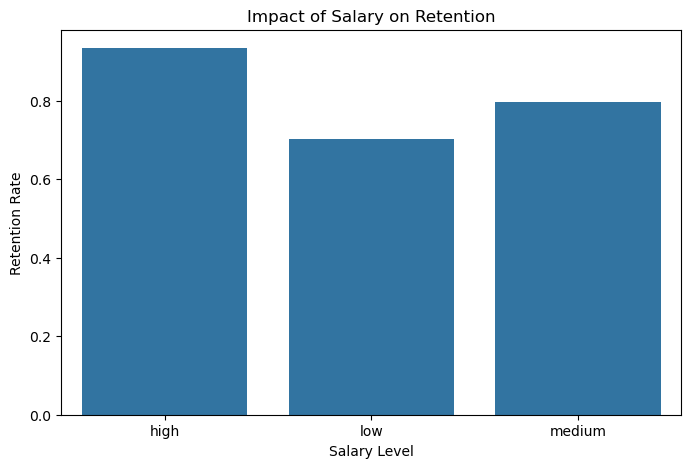

In [19]:
# Plot Bar Chart for Salary vs Retention
plt.figure(figsize=(8, 5))
sns.barplot(x='salary', y='retention_rate', data=salary_retention)
plt.title('Impact of Salary on Retention')
plt.xlabel('Salary Level')
plt.ylabel('Retention Rate')
plt.show()

# Plot Bar Chart for Department vs Retention

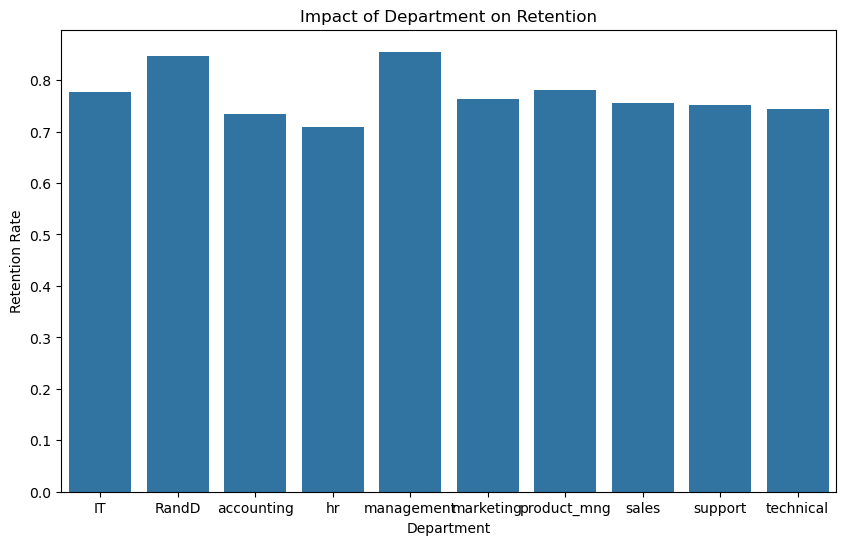

In [18]:
dept_retention = df.groupby('Department')['left'].mean().reset_index()
dept_retention['retention_rate'] = 1 - dept_retention['left']

# Plot Bar Chart for Department vs Retention
plt.figure(figsize=(10, 6))
sns.barplot(x='Department', y='retention_rate', data=dept_retention)
plt.title('Impact of Department on Retention')
plt.xlabel('Department')
plt.ylabel('Retention Rate')

plt.show()


# Split dataset and Train dataset

In [22]:
df = pd.get_dummies(df, columns=['salary'], drop_first=True)
X = df[['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 
        'Work_accident', 'promotion_last_5years', 'salary_low', 'salary_medium']]
y = df['left']

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Model and Fit

In [28]:
model = LogisticRegression().fit(X_train, y_train)
model

C:\Users\haier\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Predict Model

In [31]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

# Accuracy Model

In [32]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.7853333333333333

# Confusion Matrix

In [33]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[2115,  179],
       [ 465,  241]], dtype=int64)